# Linear Discriminant Analysis in Python

Linear discriminant analysis is a method you can use when you have a set of predictor variables and you’d like to classify a response variable into two or more classes.

This tutorial provides a step-by-step example of how to perform linear discriminant analysis in Python.

### Step 1: Load Necessary Libraries

First, we’ll load the necessary functions and libraries for this example:

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### Step 2: Load the Data
For this example, we’ll use the iris dataset from the sklearn library. The following code shows how to load this dataset and convert it to a pandas DataFrame to make it easy to work with:

In [3]:
#load iris dataset
iris = datasets.load_iris()

#convert dataset to pandas DataFrame
df = pd.DataFrame(data = np.c_[iris['data'], iris['target']],
                 columns = iris['feature_names'] + ['target'])
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
df.columns = ['s_length', 's_width', 'p_length', 'p_width', 'target', 'species']

#view first six rows of DataFrame
df.head()

,s_length,s_width,p_length,p_width,target,species
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa


In [4]:
#find how many total observations are in dataset
len(df.index)

150

### Note:
We can see that the dataset contains 150 total observations.

For this example we’ll build a linear discriminant analysis model to classify which species a given flower belongs to.

We’ll use the following predictor variables in the model:

- Sepal length
- Sepal width
- Petal length
- Petal width

And we’ll use them to predict the response variable Species, which takes on the following three potential classes:

- setosa
- versicolor
- virginica

### Step 3: Fit the LDA Model
Next, we’ll fit the LDA model to our data using the LinearDiscriminantAnalsyis function from sklearn:

In [5]:
#define predictor and response variables
X = df[['s_length', 's_width', 'p_length', 'p_width']]
y = df['species']

#Fit the LDA model
model = LinearDiscriminantAnalysis()
model.fit(X, y)

LinearDiscriminantAnalysis()

### Step 4: Use the Model to Make Predictions
Once we’ve fit the model using our data, we can evaluate how well the model performed by using repeated stratified k-fold cross validation. 

For this example, we’ll use 10 folds and 3 repeats:

In [6]:
#Define method to evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print(np.mean(scores))   

0.9800000000000001


### Note: 
We can see that the model performed a mean accuracy of 98%.

We can also use the model to predict which class a new flower belongs to, based on input values:

In [8]:
#define new observation
new = [5, 3, 1, .4]

#predict which class the new observation belongs to
model.predict([new])

array(['setosa'], dtype='<U10')

### Note:
We can see that the model predicts this new observation to belong to the species called setosa.

# Step 5: Visualize the Results
Lastly, we can create an LDA plot to view the linear discriminants of the model and visualize how well it separated the three different species in our dataset:

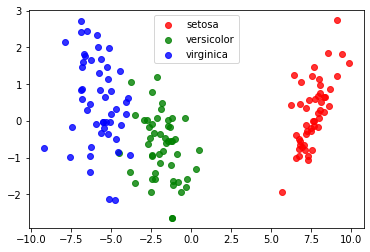

In [9]:
#define data to plot
X = iris.data
y = iris.target
model = LinearDiscriminantAnalysis()
data_plot = model.fit(X, y).transform(X)
target_names = iris.target_names

#create LDA plot
plt.figure()
colors = ['red', 'green', 'blue']
lw = 2
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(data_plot[y == i, 0], data_plot[y == i, 1], alpha=.8, color=color,
                label=target_name)

#add legend to plot
plt.legend(loc='best', shadow=False, scatterpoints=1)

#display LDA plot
plt.show()